<a href="https://colab.research.google.com/github/ethlynsaltzman/Project-2/blob/main/capstoneproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
#in this analysis I decided to look the relationship between SWD status and graduation rate"
import pandas as pd
import numpy as np
import seaborn as sns
grad = pd.read_csv('/content/2017_-_2018_Graduation_Outcomes_School_20240102.csv')
pd.options.display.max_rows = 100
grad.head(100)


<ipython-input-93-3d1bf94ec473>:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  grad = pd.read_csv('/content/2017_-_2018_Graduation_Outcomes_School_20240102.csv')


,DBN,School Name,Demographic Category,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort,Total Regents #,...,Regents w/o Advanced #,Regents w/o Advanced % of cohort,Regents w/o Advanced % of grads,Local #,Local % of cohort,Local % of grads,Still Enrolled #,Still Enrolled % of cohort,Dropped Out #,Dropped Out % of cohort
0,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,014",4 year August,29,28,96.6,25,...,25,86.2,89.3,3,10.3,10.7,0,0.0,1,3.4
1,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,013",4 year August,36,25,69.4,23,...,23,63.9,92.0,2,5.6,8.0,3,8.3,7,19.4
2,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,012",4 year August,44,24,54.5,20,...,19,43.2,79.2,4,9.1,16.7,10,22.7,10,22.7
3,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,011",4 year August,73,46,63.0,41,...,41,56.2,89.1,5,6.8,10.9,18,24.7,7,9.6
4,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,010",4 year August,61,26,42.6,26,...,25,41.0,96.2,0,0.0,0.0,18,29.5,17,27.9
5,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,009",4 year August,85,49,57.6,44,...,44,51.8,89.8,5,5.9,10.2,28,32.9,8,9.4
6,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,008",4 year August,70,36,51.4,30,...,30,42.9,83.3,6,8.6,16.7,18,25.7,13,18.6
7,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,007",4 year August,77,45,58.4,29,...,29,37.7,64.4,16,20.8,35.6,22,28.6,5,6.5
8,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,006",4 year August,78,44,56.4,37,...,37,47.4,84.1,7,9.0,15.9,15,19.2,11,14.1
9,01M292,ORCHARD COLLEGIATE ACADEMY,All Students,All Students,"2,005",4 year August,64,44,68.8,27,...,27,42.2,61.4,17,26.6,38.6,8,12.5,9,14.1


In [94]:
# Checking data types
grad.dtypes

DBN                                 object
School Name                         object
Demographic Category                object
Demographic Variable                object
Cohort Year                         object
Cohort                              object
Total Cohort #                      object
Total Grads #                       object
Total Grads % of cohort             object
Total Regents #                     object
Total Regents % of cohort           object
Total Regents % of grads            object
Advanced Regents #                  object
Advanced Regents % of cohort        object
Advanced Regents % of grads         object
Regents w/o Advanced #              object
Regents w/o Advanced % of cohort    object
Regents w/o Advanced % of grads     object
Local #                             object
Local % of cohort                   object
Local % of grads                    object
Still Enrolled #                    object
Still Enrolled % of cohort          object
Dropped Out

In [95]:
# Below I deleted column and rows that were not of interest for this question to make the data set more managable
grad['Demographic Variable'].unique()

array(['All Students', 'Current ELL', 'ELL', 'Ever ELL', 'Former ELL',
       'Never ELL', 'Not ELL', 'Asian', 'Black', 'Hispanic',
       'Multi-Racial', 'Native American', 'White', 'Female', 'Male',
       'Female Asian', 'Female White', 'Female Black', 'Female Hispanic',
       'Female Multi-Racial', 'Female Native American', 'Male Asian',
       'Male Black', 'Male Hispanic', 'Male Multi-Racial',
       'Male Native American', 'Male White', 'Econ Disadv',
       'Not Econ Disadv', 'Not SWD', 'SWD'], dtype=object)

In [96]:
grad['Cohort'].unique()

array(['4 year August', '4 year June', '5 year August', '5 year June',
       '6 year June'], dtype=object)

In [97]:
grad=grad[['School Name','Demographic Variable', 'Cohort Year','Cohort','Total Cohort #', 'Total Grads #','Total Grads % of cohort']].copy()
grad = (grad[grad['Demographic Variable'].str.contains('SWD')]).copy()
grad= grad.drop(grad[grad.Cohort.isin(['5 year June','4 year August','5 year August'])].index).copy()

In [98]:
# chacking and cleaning: had to change. data, get rid of  rows that with "s"(small number of students) and fix formatting of numbers


In [99]:
grad.isnull().values.any()

False

In [100]:
grad.loc[grad['Total Grads % of cohort']== 's']

,School Name,Demographic Variable,Cohort Year,Cohort,Total Cohort #,Total Grads #,Total Grads % of cohort
1073,ORCHARD COLLEGIATE ACADEMY,Not SWD,"2,003",4 year June,3,s,s
1103,ORCHARD COLLEGIATE ACADEMY,Not SWD,"2,003",6 year June,3,s,s
1125,ORCHARD COLLEGIATE ACADEMY,SWD,"2,003",4 year June,2,s,s
1154,ORCHARD COLLEGIATE ACADEMY,SWD,"2,003",6 year June,2,s,s
7187,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,Not SWD,"2,009",4 year June,221,s,s
...,...,...,...,...,...,...,...
506015,ALL CITY LEADERSHIP SECONDARY SCHOOL,SWD,"2,006",6 year June,2,s,s
506016,ALL CITY LEADERSHIP SECONDARY SCHOOL,SWD,"2,005",6 year June,4,s,s
506017,ALL CITY LEADERSHIP SECONDARY SCHOOL,SWD,"2,004",6 year June,3,s,s
506018,ALL CITY LEADERSHIP SECONDARY SCHOOL,SWD,"2,003",6 year June,2,s,s


In [101]:
# removed rows with 's' which represented small student number
grad['Cohort'] = grad['Cohort'].astype(str)
grad['Demographic Variable'] = grad['Demographic Variable'].astype(str)
grad['Total Grads #'] = grad['Total Grads #'].astype(str)
grad['Total Grads % of cohort'] = grad['Total Grads % of cohort'].astype(str)
grad['Total Cohort #'] = grad['Total Cohort #'].astype(str)
grad = grad.drop(grad[grad['Total Grads #'] == 's'].index)
grad = grad.drop(grad[grad['Total Grads % of cohort'] == 's'].index)
grad = grad.drop(grad[grad['Total Cohort #'] == 's'].index)


In [102]:
grad.shape


(16968, 7)

In [103]:
# changing data types
dft = (grad[grad['Cohort Year'].str.contains(',')]).copy()
grad['Total Grads % of cohort']= grad['Total Grads % of cohort'].apply(pd.to_numeric)

In [104]:

grad['Cohort Year']= grad['Cohort Year'].str.replace(',','')
grad['Cohort Year']= grad['Cohort Year'].apply(pd.to_numeric)

In [105]:
grad['Total Cohort #']= grad['Total Cohort #'].str.replace(',','')
grad['Total Cohort #']= grad['Total Cohort #'].apply(pd.to_numeric)

In [106]:
grad['Total Grads #']= grad['Total Grads #'].str.replace(',','')
grad['Total Grads #']= grad['Total Grads #'].apply(pd.to_numeric)

In [107]:
m = grad.rename(columns={'Total Grads #':'TGN' }).copy()


In [108]:
m.dtypes

School Name                 object
Demographic Variable        object
Cohort Year                  int64
Cohort                      object
Total Cohort #               int64
TGN                          int64
Total Grads % of cohort    float64
dtype: object

In [109]:
m

,School Name,Demographic Variable,Cohort Year,Cohort,Total Cohort #,TGN,Total Grads % of cohort
1062,ORCHARD COLLEGIATE ACADEMY,Not SWD,2014,4 year June,21,19,90.5
1063,ORCHARD COLLEGIATE ACADEMY,Not SWD,2013,4 year June,24,19,79.2
1064,ORCHARD COLLEGIATE ACADEMY,Not SWD,2012,4 year June,31,18,58.1
1065,ORCHARD COLLEGIATE ACADEMY,Not SWD,2011,4 year June,53,39,73.6
1066,ORCHARD COLLEGIATE ACADEMY,Not SWD,2010,4 year June,47,24,51.1
...,...,...,...,...,...,...,...
508188,BUSHWICK COMMUNITY HIGH SCHOOL,SWD,2005,6 year June,29,3,10.3
508189,BUSHWICK COMMUNITY HIGH SCHOOL,SWD,2004,6 year June,19,3,15.8
508190,BUSHWICK COMMUNITY HIGH SCHOOL,SWD,2003,6 year June,15,2,13.3
508191,BUSHWICK COMMUNITY HIGH SCHOOL,SWD,2002,6 year June,17,6,35.3


In [110]:
 # added additional colum so I could look at total cohort and class size sperately

m['Class Size'] = m['Total Cohort #']
m


,School Name,Demographic Variable,Cohort Year,Cohort,Total Cohort #,TGN,Total Grads % of cohort,Class Size
1062,ORCHARD COLLEGIATE ACADEMY,Not SWD,2014,4 year June,21,19,90.5,21
1063,ORCHARD COLLEGIATE ACADEMY,Not SWD,2013,4 year June,24,19,79.2,24
1064,ORCHARD COLLEGIATE ACADEMY,Not SWD,2012,4 year June,31,18,58.1,31
1065,ORCHARD COLLEGIATE ACADEMY,Not SWD,2011,4 year June,53,39,73.6,53
1066,ORCHARD COLLEGIATE ACADEMY,Not SWD,2010,4 year June,47,24,51.1,47
...,...,...,...,...,...,...,...,...
508188,BUSHWICK COMMUNITY HIGH SCHOOL,SWD,2005,6 year June,29,3,10.3,29
508189,BUSHWICK COMMUNITY HIGH SCHOOL,SWD,2004,6 year June,19,3,15.8,19
508190,BUSHWICK COMMUNITY HIGH SCHOOL,SWD,2003,6 year June,15,2,13.3,15
508191,BUSHWICK COMMUNITY HIGH SCHOOL,SWD,2002,6 year June,17,6,35.3,17


In [111]:
# some summary data
g = m.groupby(['Demographic Variable']).agg({'Total Cohort #':'sum','Total Grads % of cohort':'mean','TGN':'sum', 'Class Size':'mean'})

g

,Total Cohort #,Total Grads % of cohort,TGN,Class Size
Demographic Variable,,,,
Not SWD,1502963,70.614437,1082175,172.893478
SWD,223585,48.299106,96890,27.019335


In [112]:
# just used single school to see what data was appearing for each school
dfO = (m[m['School Name'].str.contains('ORCHARD COLLEGIATE ACADEMY')])
df2011Orchard = (dfO[dfO['Cohort Year']== 2011])

df2011Orchard

,School Name,Demographic Variable,Cohort Year,Cohort,Total Cohort #,TGN,Total Grads % of cohort,Class Size
1065,ORCHARD COLLEGIATE ACADEMY,Not SWD,2011,4 year June,53,39,73.6,53
1095,ORCHARD COLLEGIATE ACADEMY,Not SWD,2011,6 year June,50,41,82.0,50
1117,ORCHARD COLLEGIATE ACADEMY,SWD,2011,4 year June,20,7,35.0,20
1146,ORCHARD COLLEGIATE ACADEMY,SWD,2011,6 year June,18,8,44.4,18


In [113]:
# looking at graduation rates rates and total size of cohort for all years both 4 year and 6 year graduation rate
dfg = m.groupby(['Cohort','Cohort Year','Demographic Variable'], as_index=False).agg({'Total Grads % of cohort':'mean','TGN':'sum','Total Cohort #':'sum', 'Class Size':'mean'}).copy()
dfg


,Cohort,Cohort Year,Demographic Variable,Total Grads % of cohort,TGN,Total Cohort #,Class Size
0,4 year June,2001,Not SWD,54.016129,28205,50715,272.661290
1,4 year June,2001,SWD,26.367816,1516,7133,40.994253
2,4 year June,2002,Not SWD,55.383902,30698,54954,268.068293
3,4 year June,2002,SWD,27.950549,1184,5114,28.098901
4,4 year June,2003,Not SWD,58.665417,31879,54239,225.995833
5,4 year June,2003,SWD,28.225806,1563,6839,31.516129
6,4 year June,2004,Not SWD,61.679924,34519,55634,210.734848
7,4 year June,2004,SWD,34.362745,2132,7765,30.450980
8,4 year June,2005,Not SWD,64.662866,37851,58519,190.615635
9,4 year June,2005,SWD,36.182230,2499,8231,28.679443


In [115]:
#calculation of weighted graduation rate for each category each year
dfg['wgr'] = (dfg['TGN']/dfg['Total Cohort #']*100).copy()
dfg

,Cohort,Cohort Year,Demographic Variable,Total Grads % of cohort,TGN,Total Cohort #,Class Size,wgr
0,4 year June,2001,Not SWD,54.016129,28205,50715,272.661290,55.614710
1,4 year June,2001,SWD,26.367816,1516,7133,40.994253,21.253330
2,4 year June,2002,Not SWD,55.383902,30698,54954,268.068293,55.861266
3,4 year June,2002,SWD,27.950549,1184,5114,28.098901,23.152131
4,4 year June,2003,Not SWD,58.665417,31879,54239,225.995833,58.775051
5,4 year June,2003,SWD,28.225806,1563,6839,31.516129,22.854218
6,4 year June,2004,Not SWD,61.679924,34519,55634,210.734848,62.046590
7,4 year June,2004,SWD,34.362745,2132,7765,30.450980,27.456536
8,4 year June,2005,Not SWD,64.662866,37851,58519,190.615635,64.681556
9,4 year June,2005,SWD,36.182230,2499,8231,28.679443,30.360831


<Axes: xlabel='Cohort Year', ylabel='wgr'>

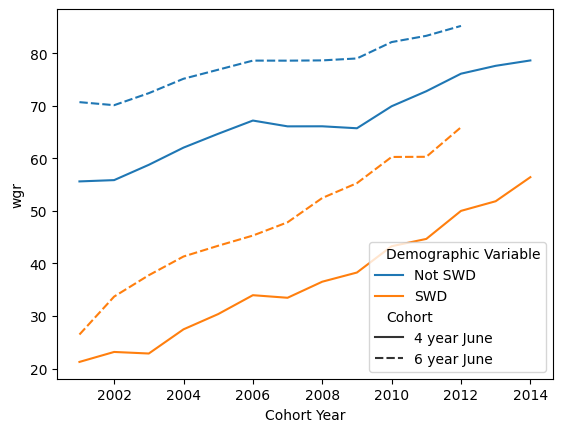

In [117]:
#plot to see changes over time in graduation rates for student with and without diabilies
sns.lineplot(data=dfg, x="Cohort Year", y="wgr", hue="Demographic Variable", style="Cohort")

In [118]:
#summary of results comparing SWD and NOT SWD
dfresults = dfg.groupby(['Cohort','Demographic Variable']).agg({'wgr':'mean', 'Total Cohort #':'sum','Class Size':'mean'})
print(dfresults)

                                        wgr  Total Cohort #  Class Size
Cohort      Demographic Variable                                       
4 year June Not SWD               66.942665          806704  180.250766
            SWD                   36.678709          123822   28.004348
6 year June Not SWD               77.569804          696259  188.811402
            SWD                   47.497669           99763   27.778087


<Axes: xlabel='Cohort Year', ylabel='Total Cohort #'>

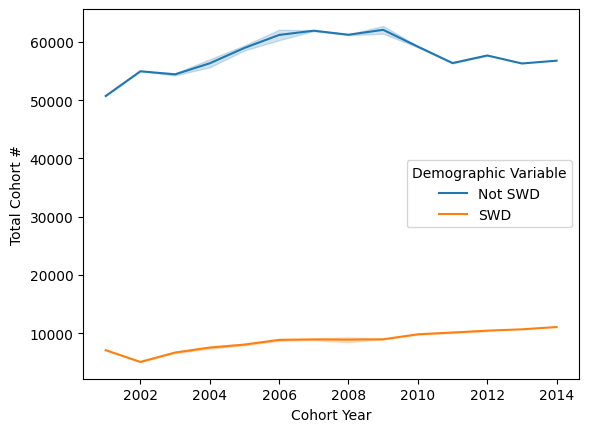

In [119]:
#size of NYC cohorts 2001-2014
sns.lineplot(data=dfg, x="Cohort Year", y="Total Cohort #", hue = "Demographic Variable")

<Axes: xlabel='Cohort Year', ylabel='Class Size'>

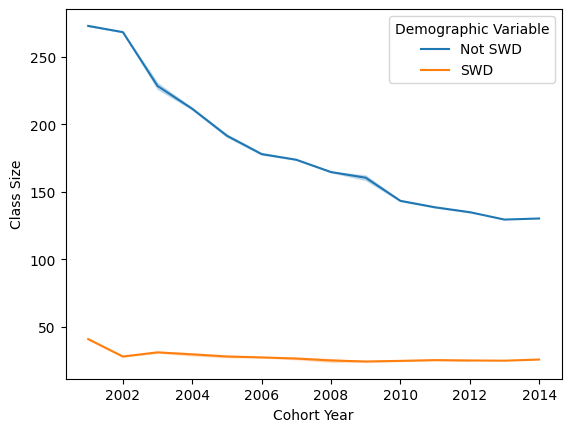

In [120]:
#average grade size/school 2001-2014
sns.lineplot(data=dfg, x="Cohort Year", y="Class Size", hue = "Demographic Variable")

In [123]:
#focus in comparison of 6 year graduation rate from year 2001 - 2012 cohorts
dfp =dfg.copy()
dfp = dfp.drop(dfp[dfp.Cohort.isin(['4 year June'])].index)
dfp['Cohort Year'] = dfp['Cohort Year'].astype(str)
values=["2012","2001"]
df2012_2021 = (dfp[dfp["Cohort Year"].isin(values)] ).copy()

df2012_2021 = df2012_2021.rename(columns={'wgr': 'Percent Graduduated in 6 years'}).copy()
df2012_2021.head(25)

,Cohort,Cohort Year,Demographic Variable,Total Grads % of cohort,TGN,Total Cohort #,Class Size,Percent Graduduated in 6 years
28,6 year June,2001,Not SWD,70.058065,35858,50715,272.661290,70.704920
29,6 year June,2001,SWD,34.497701,1888,7133,40.994253,26.468527
50,6 year June,2012,Not SWD,82.035981,49087,57605,134.591121,85.213089
51,6 year June,2012,SWD,68.351202,6826,10355,24.891827,65.919845


In [124]:
df2012_2021.dtypes

Cohort                             object
Cohort Year                        object
Demographic Variable               object
Total Grads % of cohort           float64
TGN                                 int64
Total Cohort #                      int64
Class Size                        float64
Percent Graduduated in 6 years    float64
dtype: object

In [125]:
dfcompg = df2012_2021.groupby(['Cohort Year','Demographic Variable'], as_index=  False).agg({'Total Cohort #':'sum','Total Grads % of cohort':'mean','TGN':'sum', 'Percent Graduduated in 6 years':'mean'})
dfcompg

,Cohort Year,Demographic Variable,Total Cohort #,Total Grads % of cohort,TGN,Percent Graduduated in 6 years
0,2001,Not SWD,50715,70.058065,35858,70.704920
1,2001,SWD,7133,34.497701,1888,26.468527
2,2012,Not SWD,57605,82.035981,49087,85.213089
3,2012,SWD,10355,68.351202,6826,65.919845


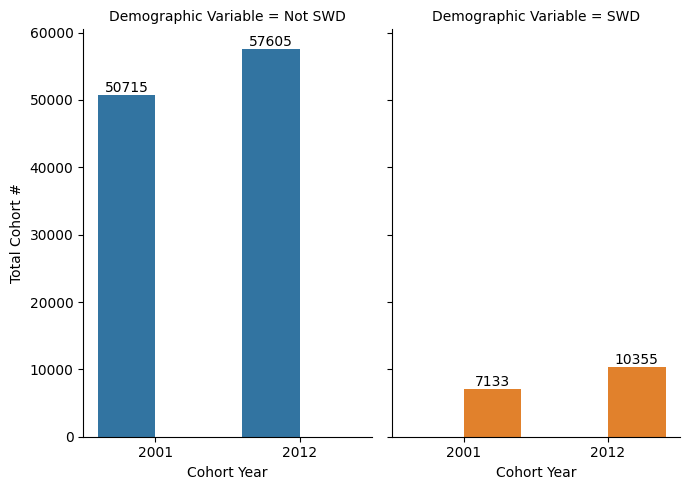

In [126]:
CP = sns.catplot(
    dfcompg, kind="bar",
    x="Cohort Year", y="Total Cohort #", col="Demographic Variable",hue= 'Demographic Variable', aspect= .7)
for CP in CP.axes.ravel():
  for c in CP.containers:
    CP.bar_label(c)


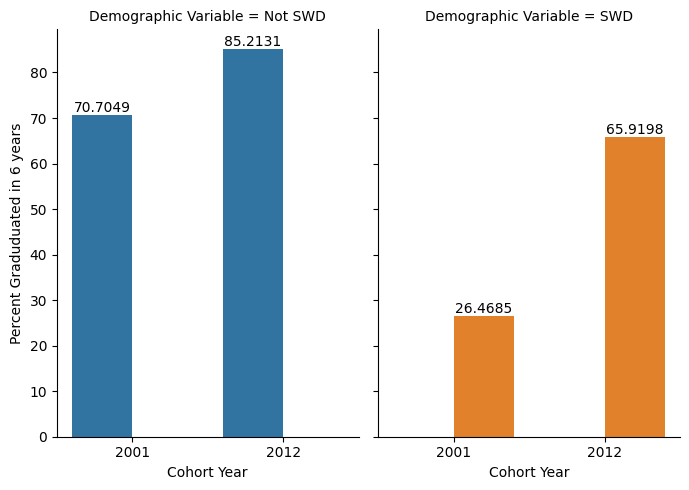

In [127]:
pc = sns.catplot(
    dfcompg, kind="bar",
    x="Cohort Year", y="Percent Graduduated in 6 years", col="Demographic Variable", hue='Demographic Variable', aspect= .7)
for pc in pc.axes.ravel():
  for c in pc.containers:
    pc.bar_label(c)


In [128]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
centered=dfg.copy()
centered['Cohort Year']= centered['Cohort Year'].apply(pd.to_numeric)
centered.dtypes


Cohort                      object
Cohort Year                  int64
Demographic Variable        object
Total Grads % of cohort    float64
TGN                          int64
Total Cohort #               int64
Class Size                 float64
wgr                        float64
dtype: object

In [129]:

center_function = lambda x: x - x.mean()
data = pd.DataFrame({ 'x': centered['Demographic Variable'], 'y': centered['Total Grads % of cohort'], 'z':centered['Cohort Year'], 'f':centered['Total Cohort #']}).copy()
centered['Cohort Year'] = center_function(centered['Cohort Year'])
model = ols("y ~ x*z", data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     53.72
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           2.26e-15
Time:                        17:38:34   Log-Likelihood:                -177.35
No. Observations:                  52   AIC:                             362.7
Df Residuals:                      48   BIC:                             370.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1754.6157    788.339     -2.226      0.0

Conclusion: Graduation rates for SWD are lower than for students without disabilities. The graduation rates have increased for both groups of studnets. The graduation rate icreased conitinously for SWD but appears to have leveled off for non diabled students. This is especially evident in the 6 year graduation rates.

The number of students in each school's cohort has decreased but the ovarall number of students in NYC has increased due to the opening of new schools.
